In [1]:
def generateHeader():
    header = []
    for i in range(1,26):
        header.append("y"+str(i))
        header.append("block"+str(i))
    header.append("biome")
    return header

In [2]:
import pandas as pd
import os
import numpy as np
path = "./Data/"
headers = generateHeader()
filename_read = os.path.join(path,"data3.csv")
df = pd.read_csv(filename_read, names = headers)
pd.get_dummies(df["biome"])

df

,y1,block1,y2,block2,y3,block3,y4,block4,y5,block5,...,block21,y22,block22,y23,block23,y24,block24,y25,block25,biome
0,68,2,68,2,71,18,69,2,69,2,...,2,68,2,69,2,69,2,69,2,18
1,69,2,69,2,69,2,70,2,70,2,...,2,69,2,70,2,70,2,70,2,18
2,68,2,69,2,69,2,69,2,69,2,...,2,69,2,69,2,69,2,69,2,18
3,68,2,68,2,68,2,68,2,68,2,...,32786,68,2,68,2,69,2,76,32786,18
4,69,2,67,2,67,2,68,2,68,2,...,2,66,2,68,4127,67,2,68,2,4
5,69,2,66,2,68,4127,68,4127,68,2,...,18,66,2,67,2,67,2,68,2,4
6,71,18,67,2,73,32786,67,2,68,2,...,2,69,2,69,2,69,2,68,2,4
7,68,2,68,2,69,2,69,2,69,2,...,2,69,2,69,2,69,2,69,2,18
8,69,2,69,2,70,2,70,2,70,2,...,2,70,2,70,2,70,2,70,2,18
9,70,2,70,2,70,2,70,2,70,2,...,2,70,2,71,2,71,2,71,2,18


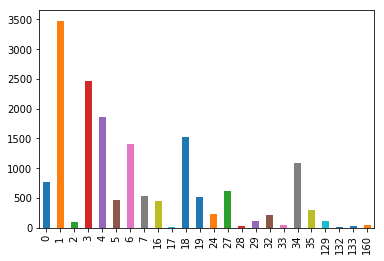

In [21]:
import matplotlib.pyplot as plt
biomes = pd.get_dummies(df['biome'])
plt.figure()

biomes.sum().plot(kind='bar')

1     3481
3     2473
4     1866
6     1410
18    1519
34    1083
dtype: int64

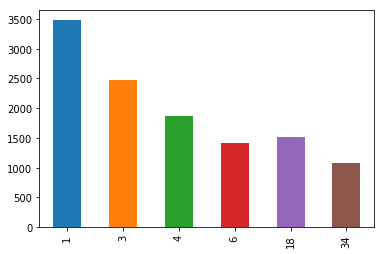

In [73]:
#getting biomes with rows more than a certain threshold
largeBs = [col for col,val in biomes.sum().iteritems() if val>1000]
df = df[df['biome'].isin(largeBs)]
biomes = pd.get_dummies(df["biome"])
biomes.sum().plot(kind='bar')
biomes.sum()

In [ ]:
#the blocks in different biomes


In [74]:
#getting 1000 of each and constructing new df
newDf = pd.DataFrame()
for biome in largeBs:
    tempDf = df[df.biome==biome]
    tempDf = tempDf.reindex(np.random.permutation(tempDf.index))
    tempDf = tempDf[0:1000]
    newDf = pd.concat([newDf, tempDf])

newDf.reset_index(inplace=True, drop=True)
newDf

,y1,block1,y2,block2,y3,block3,y4,block4,y5,block5,...,block21,y22,block22,y23,block23,y24,block24,y25,block25,biome
0,76,4127,75,2,75,2,76,4127,75,2,...,4127,76,20518,75,2,76,4127,75,2,1
1,69,4127,68,4127,67,2,67,2,68,38,...,2,67,2,68,4127,68,4127,67,2,1
2,71,2,71,2,71,2,71,2,71,2,...,2,71,2,72,4127,71,2,71,2,1
3,69,2,69,2,69,2,69,2,70,4127,...,4127,69,2,69,2,69,2,61,11,1
4,69,4127,67,2,67,2,67,2,67,2,...,3,67,2,68,4127,67,2,68,4127,1
5,69,4127,70,4127,69,2,71,4127,71,4127,...,4127,70,4127,69,2,70,4127,71,4127,1
6,71,2,71,2,71,2,71,2,72,4127,...,4127,71,2,71,2,72,4127,71,2,1
7,67,2,67,2,68,4127,64,1,63,1,...,2,67,2,67,2,67,2,67,2,1
8,66,2,68,4127,67,2,68,4127,67,2,...,2,67,4127,67,2,68,4127,67,2,1
9,67,2,67,2,68,4127,67,2,68,4127,...,4127,67,2,68,4127,68,4127,68,4127,1


In [75]:
path = './Data/'
filename_write = os.path.join(path, 'data_cleaned3.csv')
newDf.to_csv(filename_write, index = False)